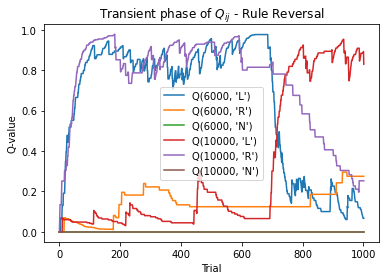

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

N=2000
T=1000
df = pd.read_csv('expert_mice_all_trials.csv')

# Slicing the data
df_sliced = df.iloc[T:N+1]   

# Reset the index of the sliced data
df_sliced.reset_index(drop=True, inplace=True)

# Extract the columns
rew_t = df_sliced['rew_t'].astype(int)
tone_freq = df_sliced['tone_freq']
response = df_sliced['response']



# Define your rewards for each trial
R = []

for t in range(N-T):
    R.append(rew_t[t])
A=0.07

def DeltaLearningRule(A, tone_freq, response):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0, (6000, 'R'): 0, (6000, 'N'): 0, (10000, 'L'): 0, (10000, 'R'): 0, (10000, 'N'): 0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials
N=N-T
Q_values_over_trials = DeltaLearningRule(A, tone_freq, response)

P=[]
B=8

def SoftMax(Q_values_over_trials,B):
    N=len(tone_freq)
    i, j = int(tone_freq[t]), response[t]
    for t in range(N):
        current_q=Q_values_over_trials[i,j][t]
        if j == 'R':
            opposite1_q = Q_values_over_trials[i,'L'][t]  
            opposite2_q = Q_values_over_trials[i,'N'][t]  
        elif j == 'L':
            opposite1_q = Q_values_over_trials[i,'R'][t]  
            opposite2_q = Q_values_over_trials[i,'N'][t] 
        else:
            opposite1_q = Q_values_over_trials[i,'R'][t]  
            opposite2_q = Q_values_over_trials[i,'L'][t] 

        q_diff1=opposite1_q-current_q
        q_diff2=opposite2_q-current_q
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        P.append(P_t)
    return P 
            

#print(SoftMax(Q_values_over_trials,B))

    
# Plot the Q values
for key, values in Q_values_over_trials.items():
    plt.plot(values, label=f'Q{key}')
plt.xlabel('Trial')
plt.ylabel('Q-value')
plt.legend()
plt.title('Transient phase of $Q_{ij}$ - Rule Reversal')
plt.show()



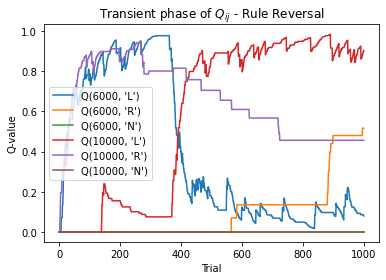

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from OOP_RealFilteredData import Simulation
import math

Q_i = {'6kHz': {'L': 0, 'R': 0, 'N': 0}, '10kHz': {'L': 0, 'R': 0, 'N': 0}}
N=2000
T=1000
# df = pd.read_csv('expert_mice_all_trials.csv')

# Slicing the data
# df_sliced = df.iloc[T:N+1]   

# Reset the index of the sliced data
# df_sliced.reset_index(drop=True, inplace=True)
sim = Simulation(T, N, Q_i)
# Extract the columns
rew_t = sim.R
tone_freq = sim.states
response = sim.actions



# Define your rewards for each trial
R = []

for t in range(N-T):
    R.append(rew_t[t])
A=0.07

def DeltaLearningRule(A, tone_freq, response):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0, (6000, 'R'): 0, (6000, 'N'): 0, (10000, 'L'): 0, (10000, 'R'): 0, (10000, 'N'): 0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials
N=N-T

frequency_mapping = {'6kHz': 6000, '10kHz': 10000}

# Apply the mapping to tone_freq
mapped_tone_freq = [frequency_mapping[freq] for freq in tone_freq]
Q_values_over_trials = DeltaLearningRule(A, mapped_tone_freq, response)

P=[]
B=8

def SoftMax(Q_values_over_trials,B):
    N=len(tone_freq)
    i, j = int(tone_freq[t]), response[t]
    for t in range(N):
        current_q=Q_values_over_trials[i,j][t]
        if j == 'R':
            opposite1_q = Q_values_over_trials[i,'L'][t]  
            opposite2_q = Q_values_over_trials[i,'N'][t]  
        elif j == 'L':
            opposite1_q = Q_values_over_trials[i,'R'][t]  
            opposite2_q = Q_values_over_trials[i,'N'][t] 
        else:
            opposite1_q = Q_values_over_trials[i,'R'][t]  
            opposite2_q = Q_values_over_trials[i,'L'][t] 

        q_diff1=opposite1_q-current_q
        q_diff2=opposite2_q-current_q
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        P.append(P_t)
    return P 
            

#print(SoftMax(Q_values_over_trials,B))

    
# Plot the Q values
for key, values in Q_values_over_trials.items():
    plt.plot(values, label=f'Q{key}')
plt.xlabel('Trial')
plt.ylabel('Q-value')
plt.legend()
plt.title('Transient phase of $Q_{ij}$ - Rule Reversal')
plt.show()

The maximum value is at: (99, 4)
The maximum value corresponds to $\alpha$ = 1.0 and $\beta$ = 0.40399999999999997


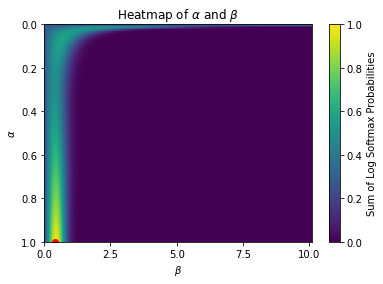

Last set of Q_ij's is {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 0.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials
 

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[0:100].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[0:100].reset_index(drop=True)
response = df['response'].iloc[0:100].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t100 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t100[key] = last_value

print("Last set of Q_ij's is",Q_at_t100)




The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


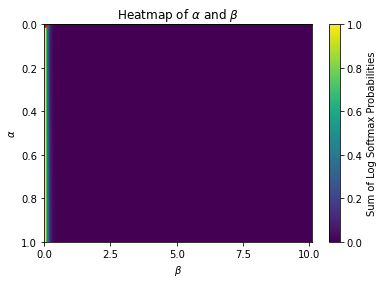

Last set of Q_ij's is {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials
 

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[100:201].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[100:201].reset_index(drop=True)
response = df['response'].iloc[100:201].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t200 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t200[key] = last_value

print("Last set of Q_ij's is",Q_at_t200)




The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


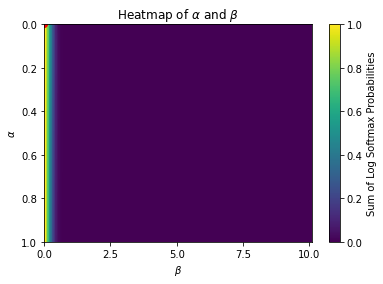

Last set of Q_ij's is {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        i, j = int(tone_freq[t]), response[t]
        q_current=Q_values_over_trials[i,j][t]
        if j =='R':
            opp_j1='L' 
            opp_j2='N'
        elif j=='L':
            opp_j1='N'
            opp_j2='R'
        else:
            opp_j1='R'
            opp_j2='L'
        q_opp_j1=Q_values_over_trials[i,opp_j1][t]
        q_opp_j2=Q_values_over_trials[i,opp_j2][t]
        q_diff1=q_opp_j1-q_current
        q_diff2=q_opp_j2-q_current
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        if P_t <= 1e-15:  # Avoiding too small values
            P.append(-1e15)  # log(small num)= neg large num
        else:
            P.append(P_t)
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[200:300].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[200:300].reset_index(drop=True)
response = df['response'].iloc[200:300].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t300 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t300[key] = last_value

print("Last set of Q_ij's is",Q_at_t300)


The maximum value is at: (25, 1)
The maximum value corresponds to $\alpha$ = 0.25252525252525254 and $\beta$ = 0.10099999999999999


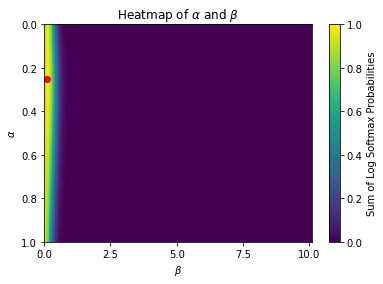

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q =  {(6000, 'L'): 1.0, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.0, (10000, 'R'): 1.0, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        i, j = int(tone_freq[t]), response[t]
        q_current=Q_values_over_trials[i,j][t]
        if j =='R':
            opp_j1='L' 
            opp_j2='N'
        elif j=='L':
            opp_j1='N'
            opp_j2='R'
        else:
            opp_j1='R'
            opp_j2='L'
        q_opp_j1=Q_values_over_trials[i,opp_j1][t]
        q_opp_j2=Q_values_over_trials[i,opp_j2][t]
        q_diff1=q_opp_j1-q_current
        q_diff2=q_opp_j2-q_current
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        if P_t <= 1e-15:  # Avoiding too small values
            P.append(-1e15)  # log(small num)= neg large num
        else:
            P.append(P_t)
    return P

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[300:400].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[300:400].reset_index(drop=True)
response = df['response'].iloc[300:400].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t400 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t400[key] = last_value

print("Last set of Q_ij's is",Q_at_t400)


The maximum value is at: (0, 1)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.10099999999999999


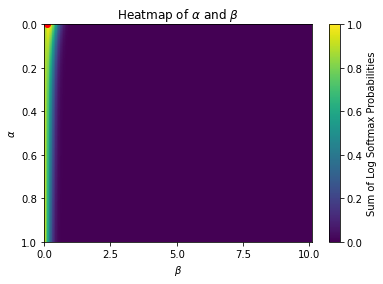

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        i, j = int(tone_freq[t]), response[t]
        q_current=Q_values_over_trials[i,j][t]
        if j =='R':
            opp_j1='L' 
            opp_j2='N'
        elif j=='L':
            opp_j1='N'
            opp_j2='R'
        else:
            opp_j1='R'
            opp_j2='L'
        q_opp_j1=Q_values_over_trials[i,opp_j1][t]
        q_opp_j2=Q_values_over_trials[i,opp_j2][t]
        q_diff1=q_opp_j1-q_current
        q_diff2=q_opp_j2-q_current
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        if P_t <= 1e-15:  # Avoiding too small values
            P.append(-1e15)  # log(small num)= neg large num
        else:
            P.append(P_t)
    return P

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[400:500].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[400:500].reset_index(drop=True)
response = df['response'].iloc[400:500].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t500 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t500[key] = last_value

print("Last set of Q_ij's is",Q_at_t500)


The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


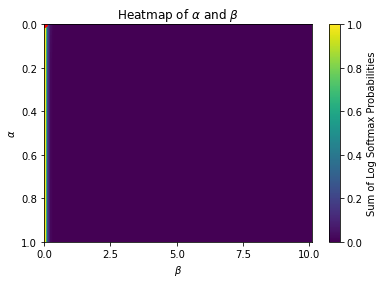

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        i, j = int(tone_freq[t]), response[t]
        q_current=Q_values_over_trials[i,j][t]
        if j =='R':
            opp_j1='L' 
            opp_j2='N'
        elif j=='L':
            opp_j1='N'
            opp_j2='R'
        else:
            opp_j1='R'
            opp_j2='L'
        q_opp_j1=Q_values_over_trials[i,opp_j1][t]
        q_opp_j2=Q_values_over_trials[i,opp_j2][t]
        q_diff1=q_opp_j1-q_current
        q_diff2=q_opp_j2-q_current
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        if P_t <= 1e-15:  # Avoiding too small values
            P.append(-1e15)  # log(small num)= neg large num
        else:
            P.append(P_t)
    return P

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[500:600].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[500:600].reset_index(drop=True)
response = df['response'].iloc[500:600].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t600 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t600[key] = last_value

print("Last set of Q_ij's is",Q_at_t600)


The maximum value is at: (0, 0)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 0.0


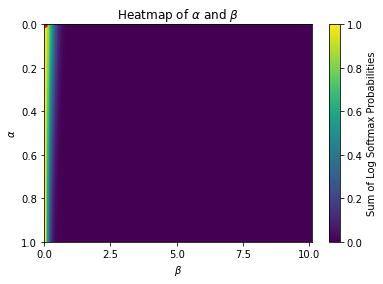

Last set of Q_ij's is {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        i, j = int(tone_freq[t]), response[t]
        q_current=Q_values_over_trials[i,j][t]
        if j =='R':
            opp_j1='L' 
            opp_j2='N'
        elif j=='L':
            opp_j1='N'
            opp_j2='R'
        else:
            opp_j1='R'
            opp_j2='L'
        q_opp_j1=Q_values_over_trials[i,opp_j1][t]
        q_opp_j2=Q_values_over_trials[i,opp_j2][t]
        q_diff1=q_opp_j1-q_current
        q_diff2=q_opp_j2-q_current
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        P.append(P_t)
    return P

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[600:700].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[600:700].reset_index(drop=True)
response = df['response'].iloc[600:700].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t700 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t700[key] = last_value

print("Last set of Q_ij's is",Q_at_t700)


The maximum value is at: (21, 8)
The maximum value corresponds to $\alpha$ = 0.21212121212121213 and $\beta$ = 0.8079999999999999


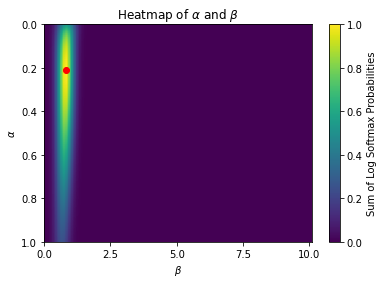

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.6788658244182968, (6000, 'R'): 0.0, (6000, 'N'): 0.0, (10000, 'L'): 0.01027700553764157, (10000, 'R'): 0.9410766486842074, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        i, j = int(tone_freq[t]), response[t]
        q_current=Q_values_over_trials[i,j][t]
        if j =='R':
            opp_j1='L' 
            opp_j2='N'
        elif j=='L':
            opp_j1='N'
            opp_j2='R'
        else:
            opp_j1='R'
            opp_j2='L'
        q_opp_j1=Q_values_over_trials[i,opp_j1][t]
        q_opp_j2=Q_values_over_trials[i,opp_j2][t]
        q_diff1=q_opp_j1-q_current
        q_diff2=q_opp_j2-q_current
        P_t=1/(1+np.exp(B*q_diff1)+np.exp(B*q_diff2))
        P.append(P_t)
    return P

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[700:800].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[700:800].reset_index(drop=True)
response = df['response'].iloc[700:800].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t800 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t800[key] = last_value

print("Last set of Q_ij's is",Q_at_t800)



The maximum value is at: (0, 12)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 1.212


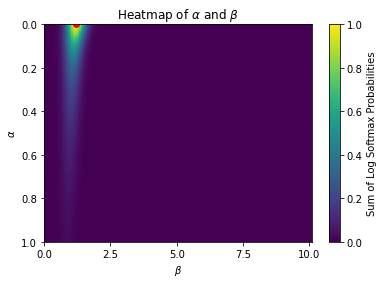

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[800:900].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[800:900].reset_index(drop=True)
response = df['response'].iloc[800:900].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t900 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t900[key] = last_value

print("Last set of Q_ij's is",Q_at_t900)


The maximum value is at: (0, 14)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 1.414


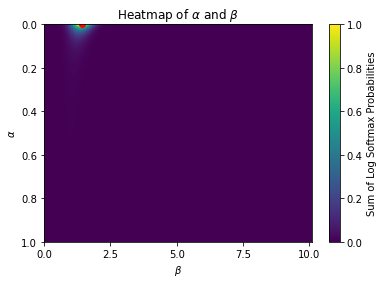

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}   
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[900:995].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[900:995].reset_index(drop=True)
response = df['response'].iloc[900:995].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []
'''For a particular alpha and beta generate MSE(alpha) vs. Num_trials and MSE(beta) vs. Num_trials'''
# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t995 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t995[key] = last_value

print("Last set of Q_ij's is",Q_at_t995)

The maximum value is at: (0, 22)
The maximum value corresponds to $\alpha$ = 0.0 and $\beta$ = 2.222


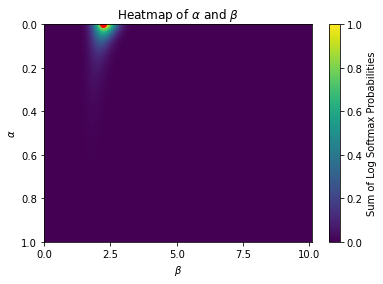

Last set of Q_ij's is {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def DeltaLearningRule(A, tone_freq, response, rew_t):
    N = len(tone_freq)

    # Define the initial Q values as a dictionary
    Q = {(6000, 'L'): 0.9993474239411612, (6000, 'R'): 0.3437960875977405, (6000, 'N'): 0.0, (10000, 'L'): 0.5168170906903506, (10000, 'R'): 0.996904065589011, (10000, 'N'): 0.0}   
    Q_history = [Q.copy()]  # Keep a history of Q at each time step

    # Iterate over the trials
    for t in range(N):
        # Get the current i and j values
        i, j = int(tone_freq[t]), response[t]

        # Update the corresponding element of the matrix
        Q[(i, j)] = Q[(i, j)] + A * (rew_t[t] - Q[(i, j)])

        # Append the updated Q to the history
        Q_history.append(Q.copy())

    # Extract the Q values for each key over trials
    Q_values_over_trials = {key: [dic[key] for dic in Q_history] for key in Q.keys()}

    return Q_values_over_trials

def SoftMax(Q_values_over_trials,B, tone_freq, response):
    N = len(tone_freq)
    P = []
    for t in range(N):
        if int(tone_freq[t])==6000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[6000,'L'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==6000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[6000,'R'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='R':
            P.append(np.exp(B*Q_values_over_trials[10000,'R'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='L':
            P.append(np.exp(B*Q_values_over_trials[10000,'L'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        elif int(tone_freq[t])==10000 and response[t]=='N':
            P.append(np.exp(B*Q_values_over_trials[10000,'N'][t]) / (np.exp(B*Q_values_over_trials[10000,'L'][t])+np.exp(B*Q_values_over_trials[10000,'R'][t])+np.exp(B*Q_values_over_trials[10000,'N'][t])))
        else:
            P.append(np.exp(B*Q_values_over_trials[6000,'N'][t]) / (np.exp(B*Q_values_over_trials[6000,'L'][t])+np.exp(B*Q_values_over_trials[6000,'R'][t])+np.exp(B*Q_values_over_trials[6000,'N'][t])))
    return P 

# Load data
df = pd.read_csv('expert_mice_all_trials.csv')
rew_t = df['rew_t'].iloc[995:1100].reset_index(drop=True).astype(int)
tone_freq = df['tone_freq'].iloc[995:1100].reset_index(drop=True)
response = df['response'].iloc[995:1100].reset_index(drop=True)

N_A = 100  # number of divisions for A
N_B = 101  # number of divisions for B

log_softmax_array = []

# Iterate over A and B values
for A in np.linspace(0, 1, N_A):
    for B in np.linspace(0, 10.1, N_B):
        Q_values_over_trials = DeltaLearningRule(A, tone_freq, response, rew_t)
        softmax_values = SoftMax(Q_values_over_trials, B, tone_freq, response)
        log_softmax_values = np.log(softmax_values)
        sum_log_softmax = np.sum(log_softmax_values)
        log_softmax_array.append(sum_log_softmax)

# Reshape the array to be a matrix
log_softmax_matrix = np.array(log_softmax_array).reshape(N_A, N_B)

# Plot the matrix as a heatmap
plt.imshow(np.flipud(np.exp(log_softmax_matrix - np.max(log_softmax_matrix))), origin='lower', extent=[0,10.1,0,1], aspect='auto')

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Sum of Log Softmax Probabilities')

# Label axes
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')

# Set the ticks
ax = plt.gca()
ax.set_xticks(np.arange(0, 10.1, 2.5))  # Set x-axis ticks at 0, 2.5, 5, 7.5, 10
ax.set_yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks at 0, 0.2, 0.4, 0.6, 0.8, 1

# Set the tick labels
ax.set_xticklabels(np.round(np.arange(0, 10.1, 2.5), 1))  # Set x-axis labels at 0, 2.5, 5, 7.5, 10
ax.set_yticklabels(np.flip(np.round(np.arange(0, 1.01, 0.2), 1)))  # Set y-axis labels at 0, 0.2, 0.4, 0.6, 0.8, 1

plt.title(r'Heatmap of $\alpha$ and $\beta$')

# Get the index of the maximum value in the flattened array
index_flattened = np.argmax(log_softmax_array)

# Convert this index to 2D coordinates
index_2d = np.unravel_index(index_flattened, log_softmax_matrix.shape)

print("The maximum value is at:", index_2d)

A_value = np.linspace(0, 1, N_A)[index_2d[0]]
B_value = np.linspace(0, 10.1, N_B)[index_2d[1]]

# Scatter plot on the same figure (i.e., grid)
plt.scatter(B_value, 1-A_value, color='red')

print(r'The maximum value corresponds to $\alpha$ =', A_value, r'and $\beta$ =', B_value)

# Show the plot after all elements have been added
plt.show()

Q_values_over_trials = DeltaLearningRule(A_value, tone_freq, response, rew_t)

# Initialize an empty dictionary to store the Q-values at t=100
Q_at_t995 = {}

# Loop through each key in the Q_values_over_trials dictionary
for key in Q_values_over_trials.keys():
    # Get the last value in the list corresponding to the key
    last_value = Q_values_over_trials[key][-1]
    
    # Store the last value in the Q_at_t100 dictionary
    Q_at_t995[key] = last_value

print("Last set of Q_ij's is",Q_at_t995)

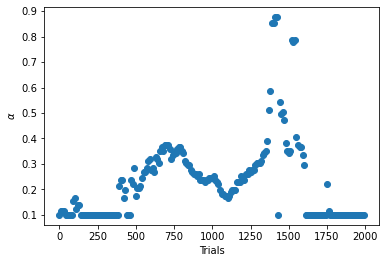

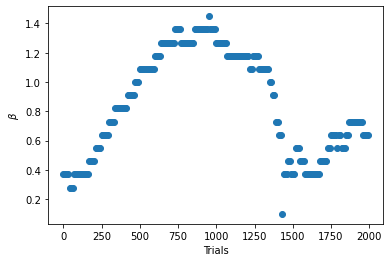

"#print(r'Max log likelihood at $\x07lpha$ =', A_optimal, r'$\x08eta$ =', B_optimal)\n\nmlE = MLE(1000, 1600, Q_i)\nA_optimal, B_optimal, LK = mlE.func()\nprint(A_optimal, B_optimal)\nplt.imshow(LK, extent=[mlE.B_range.min(), mlE.B_range.max(), mlE.A_range.min(), mlE.A_range.max()], origin='lower', aspect='auto', cmap='hot')\nplt.colorbar(label='Log Likelihood')\nplt.xlabel('B')\nplt.ylabel('A')\nplt.title('Log Likelihood Heatmap')\nplt.scatter(B_optimal, A_optimal, color='black', marker='o', s=10)\nplt.show()\n"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from OOP_RealData import MLE, Simulation


Q_i = {'6kHz': {'L': 0, 'R': 0, 'N': 0}, '10kHz': {'L': 0, 'R': 0, 'N': 0}}
A=[]
B=[]
x = range(0, 2000, 10)   #0,2000,10   2000/10 = 10000/50  
for i in x:   #(0, 1100), (10, 1110), (20, 1120), (30, 1130), (40, 1140), (50, 1150), (60, 1160) , ... , (890, 1990), (900, 2000)  
    start_trial = i
    end_trial = start_trial + 1100       
    sim2 = Simulation(start_trial,start_trial + 10, Q_i)
    mle = MLE(start_trial, end_trial, Q_i)
    A_optimal, B_optimal, ll = mle.func()
    Q_i = sim2.Delta(A_optimal)
    A.append(A_optimal)
    B.append(B_optimal)

plt.xlabel('Trials')
plt.ylabel(r'$\alpha$')
plt.scatter(x, A)
plt.show()

plt.xlabel('Trials')
plt.ylabel(r'$\beta$')
plt.scatter(x, B)
plt.show()


# intersectivity =  1 - ws/1000

'''#print(r'Max log likelihood at $\alpha$ =', A_optimal, r'$\beta$ =', B_optimal)

mlE = MLE(1000, 1600, Q_i)
A_optimal, B_optimal, LK = mlE.func()
print(A_optimal, B_optimal)
plt.imshow(LK, extent=[mlE.B_range.min(), mlE.B_range.max(), mlE.A_range.min(), mlE.A_range.max()], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Log Likelihood')
plt.xlabel('B')
plt.ylabel('A')
plt.title('Log Likelihood Heatmap')
plt.scatter(B_optimal, A_optimal, color='black', marker='o', s=10)
plt.show()
'''

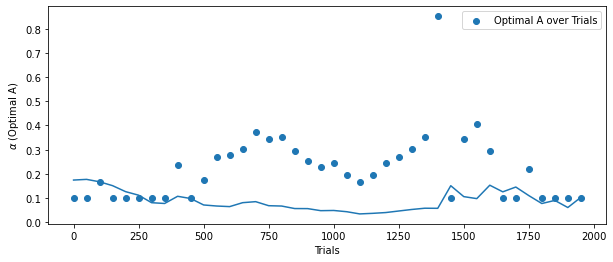

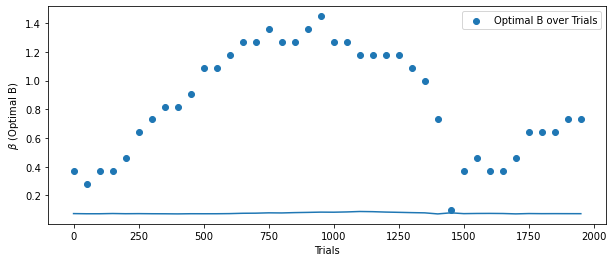

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from OOP_RealData import MLE, Simulation  # Ensure this import path is correct

Q_i = {'6kHz': {'L': 0, 'R': 0, 'N': 0}, '10kHz': {'L': 0, 'R': 0, 'N': 0}}
A = []  # Optimal A values
B = []  # Optimal B values
a_std = []
b_std = []
x = range(0, 2000, 50)


for i in x:
    mean_a = 0
    mean_b = 0
    mean_a_sq = 0
    mean_b_sq = 0
    start_trial = i
    end_trial = start_trial + 1100
    sim2 = Simulation(start_trial, start_trial + 50, Q_i)
    mle = MLE(start_trial, end_trial, Q_i)
    A_optimal, B_optimal, ll, P,_ = mle.func()
    P_B = np.sum(P, axis = 0)
    P_A = np.sum(P, axis=1)
    for A_i in range(len(mle.A_range)):
        mean_a += P_A[A_i]*mle.A_range[A_i]
        mean_a_sq += P_A[A_i]*(mle.A_range[A_i]**2)
    for B_i in range(len(mle.B_range)):
        mean_b += P_B[B_i]*mle.B_range[B_i]
        mean_b_sq += P_B[B_i]*(mle.B_range[B_i]**2)
    a_std.append(np.sqrt((mean_a_sq)-(mean_a)**2))
    b_std.append(np.sqrt((mean_b_sq)-(mean_b)**2))
    Q_i = sim2.Delta(A_optimal)
    A.append(A_optimal)
    B.append(B_optimal)

# Plot the optimal values of A
plt.figure(figsize=(10, 4))
plt.xlabel('Trials')
plt.ylabel(r'$\alpha$ (Optimal A)')
plt.scatter(x, A, label='Optimal A over Trials')
plt.plot(x, a_std)
plt.legend()
plt.show()

# Plot the optimal values of B
plt.figure(figsize=(10, 4))
plt.xlabel('Trials')
plt.ylabel(r'$\beta$ (Optimal B)')
plt.scatter(x, B, label='Optimal B over Trials')
plt.plot(x, b_std)
plt.legend()
plt.show()


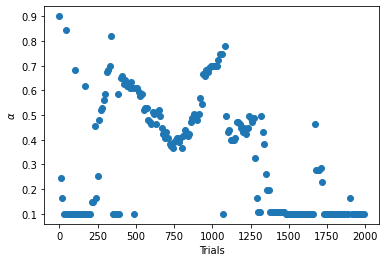

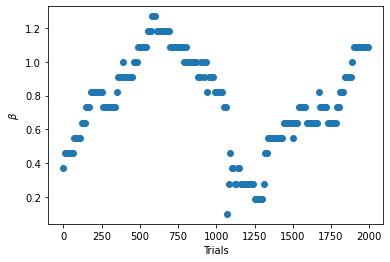

"#print(r'Max log likelihood at $\x07lpha$ =', A_optimal, r'$\x08eta$ =', B_optimal)\n\nmlE = MLE(1000, 1600, Q_i)\nA_optimal, B_optimal, LK = mlE.func()\nprint(A_optimal, B_optimal)\nplt.imshow(LK, extent=[mlE.B_range.min(), mlE.B_range.max(), mlE.A_range.min(), mlE.A_range.max()], origin='lower', aspect='auto', cmap='hot')\nplt.colorbar(label='Log Likelihood')\nplt.xlabel('B')\nplt.ylabel('A')\nplt.title('Log Likelihood Heatmap')\nplt.scatter(B_optimal, A_optimal, color='black', marker='o', s=10)\nplt.show()\n"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from OOP_RealFilteredData import MLE, Simulation


Q_i = {'6kHz': {'L': 0, 'R': 0, 'N': 0}, '10kHz': {'L': 0, 'R': 0, 'N': 0}}
A=[]
B=[]
x = range(0, 2000, 10)   #0,2000,10   2000/10 = 10000/50  
for i in x:   #(0, 1100), (10, 1110), (20, 1120), (30, 1130), (40, 1140), (50, 1150), (60, 1160) , ... , (890, 1990), (900, 2000)  
    start_trial = i
    end_trial = start_trial + 1100       
    sim2 = Simulation(start_trial,start_trial + 10, Q_i)
    mle = MLE(start_trial, end_trial, Q_i)
    A_optimal, B_optimal, ll,_,_ = mle.func()
    Q_i = sim2.Delta(A_optimal)
    A.append(A_optimal)
    B.append(B_optimal)

plt.xlabel('Trials')
plt.ylabel(r'$\alpha$')
plt.scatter(x, A)
plt.show()

plt.xlabel('Trials')
plt.ylabel(r'$\beta$')
plt.scatter(x, B)
plt.show()


# intersectivity =  1 - ws/1000

'''#print(r'Max log likelihood at $\alpha$ =', A_optimal, r'$\beta$ =', B_optimal)

mlE = MLE(1000, 1600, Q_i)
A_optimal, B_optimal, LK = mlE.func()
print(A_optimal, B_optimal)
plt.imshow(LK, extent=[mlE.B_range.min(), mlE.B_range.max(), mlE.A_range.min(), mlE.A_range.max()], origin='lower', aspect='auto', cmap='hot')
plt.colorbar(label='Log Likelihood')
plt.xlabel('B')
plt.ylabel('A')
plt.title('Log Likelihood Heatmap')
plt.scatter(B_optimal, A_optimal, color='black', marker='o', s=10)
plt.show()
'''

In [10]:
def gen(ws, ft, tR, switch):
    final = (ft-tR)*(1/ws)
    r=0
    COL = []
    for k in range(int(final)):
        L = list(range(k*(ws), k*(ws)+tR))
        if switch in L:
            col = "red"
            r+=1
        else:
            col = "blue"
        
        U = {'colour': [col], 'D_k': L}
        print(U)
        COL+=U['colour']
    print(f'rule reversal alphas = {r}')

gen(2, 50, 5, 25)



{'colour': ['blue'], 'D_k': [0, 1, 2, 3, 4]}
{'colour': ['blue'], 'D_k': [2, 3, 4, 5, 6]}
{'colour': ['blue'], 'D_k': [4, 5, 6, 7, 8]}
{'colour': ['blue'], 'D_k': [6, 7, 8, 9, 10]}
{'colour': ['blue'], 'D_k': [8, 9, 10, 11, 12]}
{'colour': ['blue'], 'D_k': [10, 11, 12, 13, 14]}
{'colour': ['blue'], 'D_k': [12, 13, 14, 15, 16]}
{'colour': ['blue'], 'D_k': [14, 15, 16, 17, 18]}
{'colour': ['blue'], 'D_k': [16, 17, 18, 19, 20]}
{'colour': ['blue'], 'D_k': [18, 19, 20, 21, 22]}
{'colour': ['blue'], 'D_k': [20, 21, 22, 23, 24]}
{'colour': ['red'], 'D_k': [22, 23, 24, 25, 26]}
{'colour': ['red'], 'D_k': [24, 25, 26, 27, 28]}
{'colour': ['blue'], 'D_k': [26, 27, 28, 29, 30]}
{'colour': ['blue'], 'D_k': [28, 29, 30, 31, 32]}
{'colour': ['blue'], 'D_k': [30, 31, 32, 33, 34]}
{'colour': ['blue'], 'D_k': [32, 33, 34, 35, 36]}
{'colour': ['blue'], 'D_k': [34, 35, 36, 37, 38]}
{'colour': ['blue'], 'D_k': [36, 37, 38, 39, 40]}
{'colour': ['blue'], 'D_k': [38, 39, 40, 41, 42]}
{'colour': ['blue'], 'D

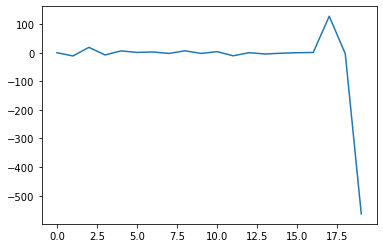

ValueError: x and y must have same first dimension, but have shapes (40,) and (0,)

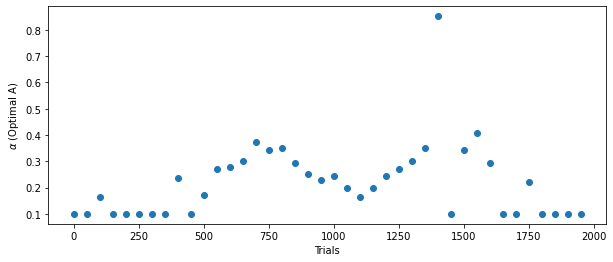

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from OOP_RealData import MLE, Simulation  # Ensure this import path is correct

Q_i = {'6kHz': {'L': 0, 'R': 0, 'N': 0}, '10kHz': {'L': 0, 'R': 0, 'N': 0}}
A = []  # Optimal A values
B = []  # Optimal B values
a_std = []
b_std = []
x = range(0, 2000, 50)
s=1
d=0
q_prev=None
A_prev=None
U=[]
for i in x:
    mean_a = 0
    mean_b = 0
    mean_a_sq = 0
    mean_b_sq = 0
    start_trial = i
    end_trial = start_trial + 1100
    sim2 = Simulation(start_trial, start_trial + 50, Q_i)
    mle = MLE(start_trial, end_trial, Q_i)
    A_optimal, B_optimal, ll, P, q = mle.func()
    if (q_prev==None) and (A_prev==None):
        der = 0
    else:
        der = der + (s)*(q-q_prev)/(A_optimal - A_prev+0.01)**2

    d+=1
    if d % 2 ==0:
        s=-1
    else:
        s=1
        U.append(der)
        der=0
    Q_i = sim2.Delta(A_optimal)
    A_prev = A_optimal
    q_prev = q
    A.append(A_optimal)
    B.append(B_optimal)


plt.plot(list(range(len(U))), U)
plt.show()

# Plot the optimal values of A
plt.figure(figsize=(10, 4))
plt.xlabel('Trials')
plt.ylabel(r'$\alpha$ (Optimal A)')
plt.scatter(x, A, label='Optimal A over Trials')
plt.plot(x, a_std)
plt.legend()
plt.show()

# Plot the optimal values of B
plt.figure(figsize=(10, 4))
plt.xlabel('Trials')
plt.ylabel(r'$\beta$ (Optimal B)')
plt.scatter(x, B, label='Optimal B over Trials')
plt.plot(x, b_std)
plt.legend()
plt.show()


In [21]:
print(80%2)

0


In [19]:
import numpy as np
U = [[2,3,121],[100,7,8]]
s = np.zeros((len(U[0]), len(U[0])))
i,j=np.unravel_index(np.argmax(U), s.shape)

print(U[i][j])

121


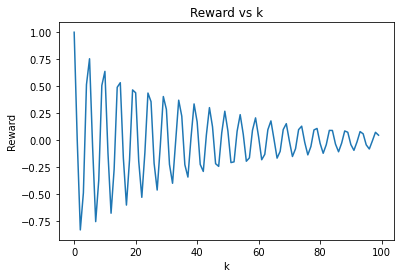

In [196]:
import matplotlib.pyplot as plt
import numpy as np

def reward(k, a, memo={}):
    if k in memo:
        return memo[k]
    
    if k == 0: 
        return 1

    sum = 0
    for i in range(1, k):
        M = (1 + 2 * a) - ((a * (k - i) * (1 + a)) / (1 - a))
        sum += ((1 - a) ** (k - i)) * reward(i - 1, a, memo) * M

    memo[k] = sum
    return sum

def LIST(a):
    return [reward(s, a) for s in range(0, 100)]

# Convert v to a NumPy array for element-wise operations
v = np.arange(0, 100)

plt.plot(v, LIST(0.781))
plt.xlabel('k')
plt.ylabel('Reward')
plt.title('Reward vs k')
plt.show()






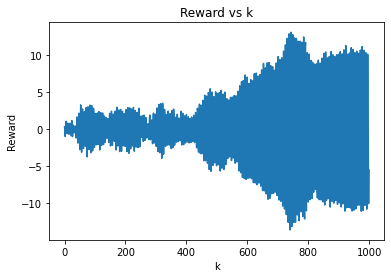

In [167]:
import matplotlib.pyplot as plt
import numpy as np
def reward(k, a, memo={}):
    if k in memo:
        return memo[k]
    
    if k == 0: 
        return np.random.uniform(0.1,1)

    sum = 0
    for i in range(1, k):
        M = 2 * a + a * (k - i) -1
        sum += ((1 - a) ** (k - i)) * reward(i - 1, a, memo) * M

    memo[k] = sum
    return sum

def LIST(a):

    return [reward(s, a) for s in range(0,1000)]


v = list(range(0, 1000))

plt.plot(v, LIST(0))
plt.xlabel('k')
plt.ylabel('Reward')
plt.title('Reward vs k')
plt.show()